In [13]:
# prepare_data.py

import os
import random
from pathlib import Path
from shutil import copy2
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# ----------------------
# CONFIGURATION
# ----------------------
DATA_DIR = Path(r'C:\Users\sOrOush\SoroushProjects\15_MarburgLens\data\TMM')  # original unstructured data
OUTPUT_DIR = Path('processed_data')    # structured into train/val/test
TRAIN_RATIO = 0.7
VAL_RATIO = 0.2
TEST_RATIO = 0.1
SEED = 42

# ----------------------
# STEP 1: Split Data
# ----------------------
def split_dataset():
    random.seed(SEED)

    classes = [d.name for d in DATA_DIR.iterdir() if d.is_dir()]
    print(f"Found {len(classes)} classes: {classes}")

    for cls in classes:
        images = list((DATA_DIR / cls).glob('*'))
        random.shuffle(images)

        n_total = len(images)
        n_train = int(n_total * TRAIN_RATIO)
        n_val = int(n_total * VAL_RATIO)

        splits = {
            'train': images[:n_train],
            'val': images[n_train:n_train + n_val],
            'test': images[n_train + n_val:]
        }

        for split, imgs in splits.items():
            split_dir = OUTPUT_DIR / split / cls
            split_dir.mkdir(parents=True, exist_ok=True)
            for img in imgs:
                copy2(img, split_dir)

    print(f"Data split and copied to {OUTPUT_DIR}/!")

# ----------------------
# STEP 2: Define Transforms
# ----------------------

def get_transforms():
    train_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])

    val_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])

    return train_transform, val_transform

# ----------------------
# STEP 3: Create Datasets and Loaders
# ----------------------

def create_dataloaders(batch_size=32):
    train_transform, val_transform = get_transforms()

    train_dataset = ImageFolder(root=OUTPUT_DIR / 'train', transform=train_transform)
    val_dataset = ImageFolder(root=OUTPUT_DIR / 'val', transform=val_transform)
    test_dataset = ImageFolder(root=OUTPUT_DIR / 'test', transform=val_transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

    print(f"Datasets ready: {len(train_dataset)} train, {len(val_dataset)} val, {len(test_dataset)} test samples.")
    return train_loader, val_loader, test_loader

# ----------------------
# STEP 4: Check Folder Stats
# ----------------------

def print_folder_stats(base_dir=DATA_DIR):
    print(f"\nFolder stats for {base_dir}:")
    for cls_dir in sorted(base_dir.glob('*')):
        if cls_dir.is_dir():
            num_images = len(list(cls_dir.glob('*')))
            print(f"- {cls_dir.name}: {num_images} images")

# ----------------------
# MAIN
# ----------------------
if __name__ == '__main__':
    #split_dataset()
    print_folder_stats(OUTPUT_DIR / 'train')
    print_folder_stats(OUTPUT_DIR / 'val')
    print_folder_stats(OUTPUT_DIR / 'test')
    # After splitting, you can call create_dataloaders() inside your train.py!



Folder stats for processed_data\train:
- Bahnhofstraße 7: 46 images
- Barfüßstraße 1: 51 images
- Biegenstraße 11: 62 images
- Biegenstraße 12: 33 images
- Biegenstraße 14: 33 images
- Biegenstraße 9: 30 images
- Deutschhausstraße 1: 69 images
- Deutschhausstraße 10, Deutches Haus, Fachbereich Geographie: 72 images
- Deutschhausstraße 12: 94 images
- Deutschhausstraße 17: 26 images
- Deutschhausstraße 17A: 8 images
- Deutschhausstraße 17B: 27 images
- Deutschhausstraße 3: 45 images
- Ketzerbach 11: 14 images
- Ketzerbach 63: 37 images
- Landgraf-Philipp-Straße 4: 44 images
- Marbacher Weg 6: 40 images
- Mineralogisches Museum: 23 images
- Pilgrimstein 2: 55 images
- Renthof 5: 33 images
- Renthof 6: 23 images
- Robert-Koch-Straße 4: 35 images
- Robert-Koch-Straße 6: 81 images
- Roter-Graben-10: 14 images
- Schulstraße 12: 30 images
- Universitätsstraße 24: 54 images
- Universitätsstraße 25: 77 images
- Universitätsstraße 6: 27 images
- Universitätsstraße 7: 29 images

Folder stats for

In [12]:
if __name__ == '__main__':
    # At this stage, ONLY print stats on original data
    #print_folder_stats(DATA_DIR)

    split_dataset()
    # print_folder_stats(OUTPUT_DIR / 'train')
    # print_folder_stats(OUTPUT_DIR / 'val')
    # print_folder_stats(OUTPUT_DIR / 'test')
    # After splitting, you can call create_dataloaders() inside your train.py!


Found 29 classes: ['Bahnhofstraße 7', 'Barfüßstraße 1', 'Biegenstraße 11', 'Biegenstraße 12', 'Biegenstraße 14', 'Biegenstraße 9', 'Deutschhausstraße 1', 'Deutschhausstraße 10, Deutches Haus, Fachbereich Geographie', 'Deutschhausstraße 12', 'Deutschhausstraße 17', 'Deutschhausstraße 17A', 'Deutschhausstraße 17B', 'Deutschhausstraße 3', 'Ketzerbach 11', 'Ketzerbach 63', 'Landgraf-Philipp-Straße 4', 'Marbacher Weg 6', 'Mineralogisches Museum', 'Pilgrimstein 2', 'Renthof 5', 'Renthof 6', 'Robert-Koch-Straße 4', 'Robert-Koch-Straße 6', 'Roter-Graben-10', 'Schulstraße 12', 'Universitätsstraße 24', 'Universitätsstraße 25', 'Universitätsstraße 6', 'Universitätsstraße 7']
Data split and copied to processed_data/!


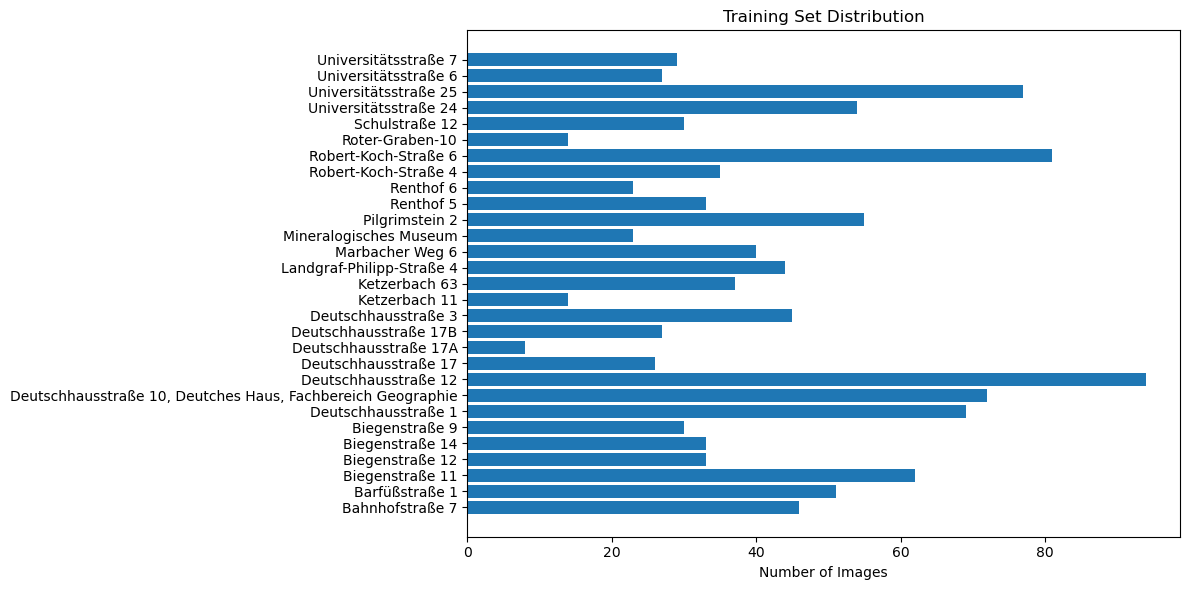

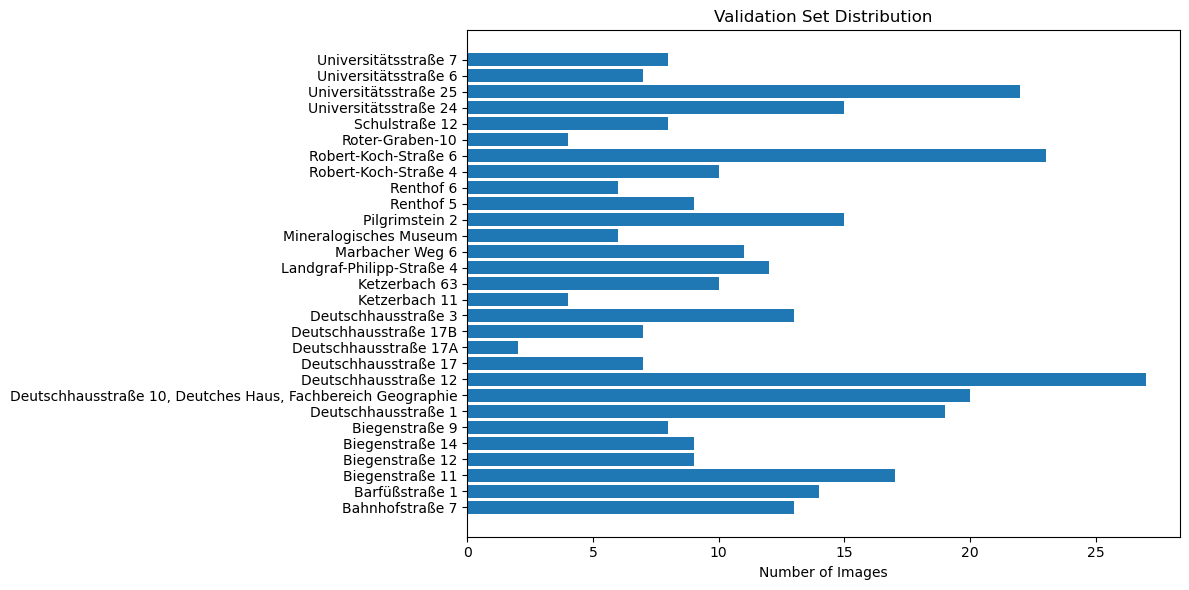

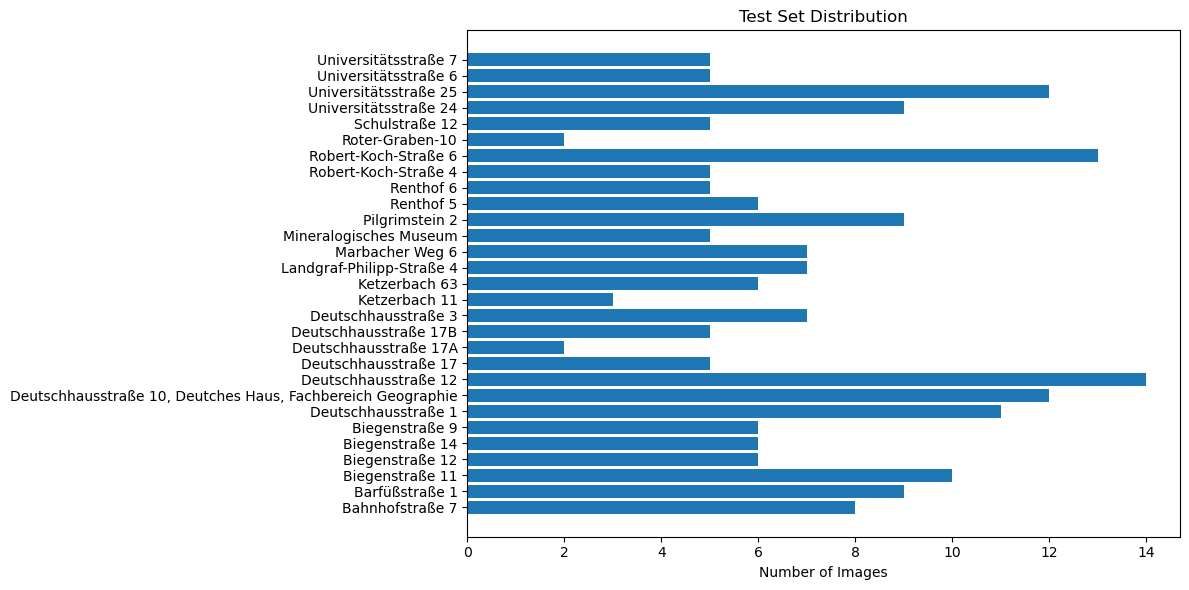

In [14]:
# plot_data_distribution.py

import matplotlib.pyplot as plt
from pathlib import Path

def plot_data_distribution(folder_path, title="Data Distribution"):
    """
    Plots a bar chart showing the number of images in each class folder.

    Args:
        folder_path (str or Path): Path to the main directory containing class folders.
        title (str): Title of the plot.
    """
    folder_path = Path(folder_path)
    class_counts = {}
    for class_folder in sorted(folder_path.glob('*')):
        if class_folder.is_dir():
            count = len(list(class_folder.glob('*')))
            class_counts[class_folder.name] = count

    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(12, 6))
    plt.barh(classes, counts)
    plt.xlabel('Number of Images')
    plt.title(title)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Example usage
    plot_data_distribution('processed_data/train', title="Training Set Distribution")
    plot_data_distribution('processed_data/val', title="Validation Set Distribution")
    plot_data_distribution('processed_data/test', title="Test Set Distribution")


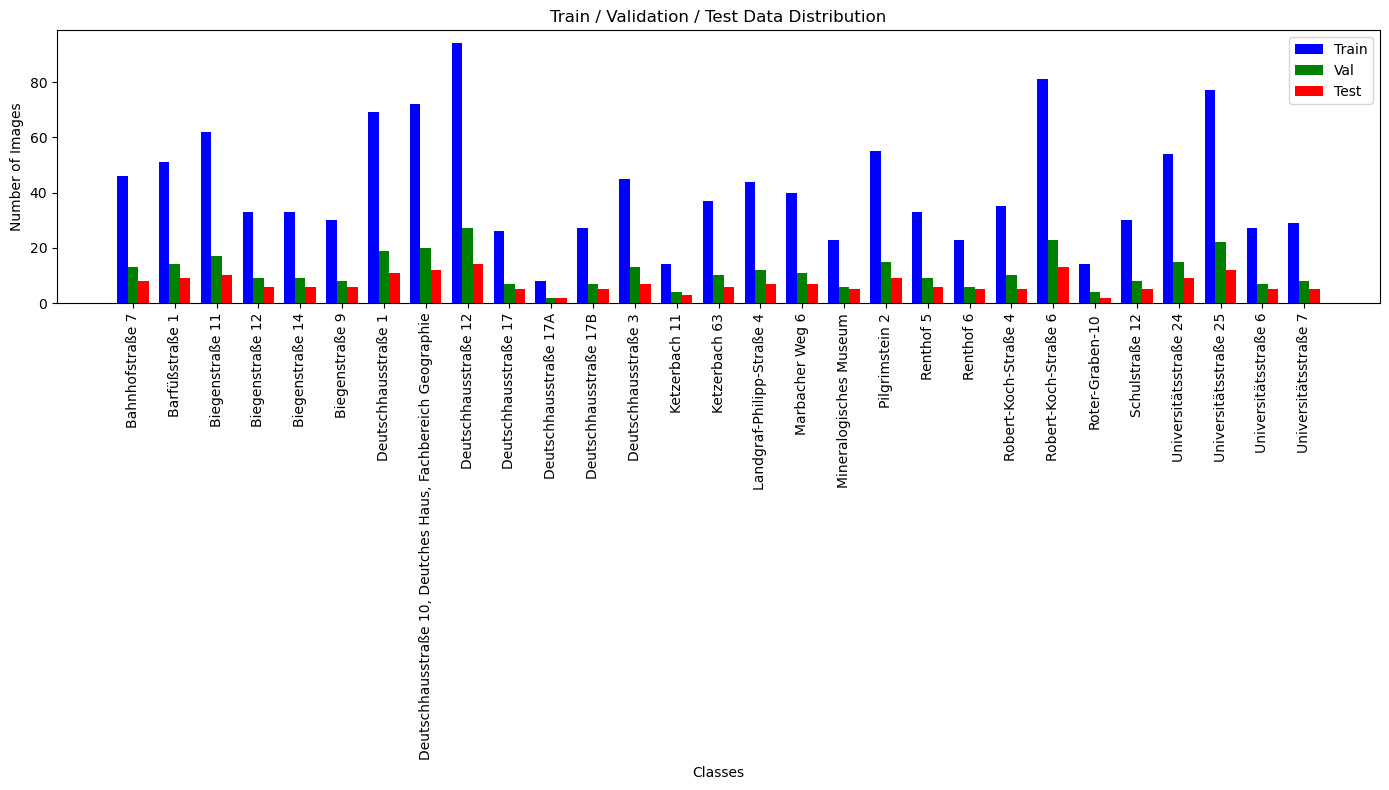

In [15]:
# plot_data_distribution.py

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def plot_combined_distribution(base_path='processed_data'):
    datasets = ['train', 'val', 'test']
    colors = ['blue', 'green', 'red']
    counts_dict = {}

    for dataset in datasets:
        dataset_path = Path(base_path) / dataset
        class_counts = {}
        for class_folder in sorted(dataset_path.glob('*')):
            if class_folder.is_dir():
                count = len(list(class_folder.glob('*')))
                class_counts[class_folder.name] = count
        counts_dict[dataset] = class_counts

    classes = sorted(list(set(k for d in counts_dict.values() for k in d.keys())))
    x = np.arange(len(classes))
    width = 0.25

    fig, ax = plt.subplots(figsize=(14, 8))

    for idx, dataset in enumerate(datasets):
        counts = [counts_dict[dataset].get(cls, 0) for cls in classes]
        ax.bar(x + idx * width, counts, width, label=dataset.capitalize(), color=colors[idx])

    ax.set_xlabel('Classes')
    ax.set_ylabel('Number of Images')
    ax.set_title('Train / Validation / Test Data Distribution')
    ax.set_xticks(x + width)
    ax.set_xticklabels(classes, rotation=90)
    ax.legend()
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    plot_combined_distribution('processed_data')